# Dimensionality Reduction

## Principal Components Analysis (PCA)

$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\Yv}{\mathbf{Y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\betav}{\mathbf{\beta}}
\newcommand{\gv}{\mathbf{g}}
\newcommand{\Hv}{\mathbf{H}}
\newcommand{\dv}{\mathbf{d}}
\newcommand{\Vv}{\mathbf{V}}
\newcommand{\vv}{\mathbf{v}}
\newcommand{\Uv}{\mathbf{U}}
\newcommand{\uv}{\mathbf{u}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\Sv}{\mathbf{S}}
\newcommand{\Gv}{\mathbf{G}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\Zv}{\mathbf{Z}}
\newcommand{\Norm}{\mathcal{N}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}
\newcommand{\dimensionbar}[1]{\underset{#1}{\operatorname{|}}}
\newcommand{\grad}{\mathbf{\nabla}}
\newcommand{\ebx}[1]{e^{\betav_{#1}^T \xv_n}}
\newcommand{\eby}[1]{e^{y_{n,#1}}}
\newcommand{\Tiv}{\mathbf{Ti}}
\newcommand{\Fv}{\mathbf{F}}
\newcommand{\ones}[1]{\mathbf{1}_{#1}}$

Principal Components Analysis (PCA) is a way to find and use directions in the data space along which data samples vary the most.

Assume samples have $D$ attributes, meaning each sample is
$D$-dimensional.  We want to project each sample to a smaller space,
of dimension $M$ such that the variance of the projected data has
maximum variance.

Let's assume each sample $\xv_n$ has zero mean.  For $M=1$, we want
the direction vector (unit length) $\uv_1$ that maximizes the variance
of each projected sample. This variance is
$$
\frac{1}{N} \sum_{n=1}^N (\uv_1^T \xv_n)^2 = \uv_1^T \Sv \uv_1
$$
where
$$
\Sv = \frac{1}{N} \sum_{n=1}^N \xv_n \xv_n^T
$$
To maximize $\uv_1^T \Sv \uv_1$ in a non-trivial way, we constrain
$\uv_1^T \uv_1 = 1$.  This constraint is added with a Lagrange
multipler so that we want $\uv_1$ that maximizes
$$
 \uv_1^T \Sv \uv_1+ \lambda_1(1-\uv_1^T \uv_1)
$$
Setting the derivative of this with respect to $\uv_1$ to zero we find
that
$$
\Sv \uv_1 = \lambda_1 \uv_1
$$
so $\uv_1$ is an eigenvector of $\Sv$ and $\lambda_1$ is an eigenvalue
that is the variance of the projected samples.

Additional directions, all orthogonal to each other, are found by the
eigendecomposition of $\Sv$, or, equivalently, the singular value
decomposition of data sample matrix $\Xv$ with mean zero.  
$$
\Uv \Sigmav \Vv^T = \Xv
$$
The columns of $\Vv$ are the eigenvectors of $\Sv$ and the elements of the
diagonal matrix $\Sigmav$ are the square root of the eigenvalues.

    X = X - np.mean(X,axis=0)
    U,s,V = np.linalg.svd(X)
    V = V.T
    
Then, to project onto the eigenvectors, just

    proj = np.dot(X,V)

Let's generate some two-dimensional samples from a Normal distribution
with mean [0,4] and covariance matrix 
$\Sigma=\begin{bmatrix} 0.9 & 0.8\\ 0.8 & 0.9 \end{bmatrix}$.  Then we
will calculate the svd of the samples and project the samples to the
two eigenvectors.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def mvNormalRand(n,mean,sigma):                                                 
    mean = np.array(mean) # to allow entry of values as simple lists                                                       
    sigma = np.array(sigma)                                                     
    X = np.random.normal(0,1,n*len(mean)).reshape((n,len(mean)))                
    return np.dot(X, np.linalg.cholesky(sigma)) + mean        

N = 200
data = mvNormalRand(N,[0,4],[[0.9,0.8],[0.8,0.9]])
data.shape

(200, 2)

In [3]:
means = np.mean(data,axis=0)
datan = data - means

U,S,V = np.linalg.svd(datan)
V = V.T
V.shape

(2, 2)

In [4]:
V

array([[ 0.97617567, -0.21698169],
       [ 0.21698169,  0.97617567]])

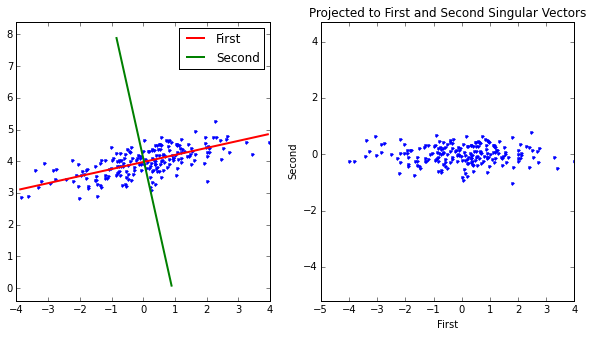

In [5]:
def drawline(v,means,len,color,label):
  p1 = means - v*len/2
  p2 = means + v*len/2
  plt.plot([p1[0],p2[0]],[p1[1],p2[1]],label=label,color=color,linewidth=2)


def plotOriginalAndTransformed(data,V):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.plot(data[:,0],data[:,1],'.')
    means = np.mean(data,axis=0)
    drawline(V[:,0],means,8,"red","First")
    drawline(V[:,1],means,8,"green","Second")
    leg = plt.legend()
    plt.axis('equal')
    plt.gca().set_aspect('equal')


    plt.subplot(1,2,2)    
    proj = np.dot(data - means, V)
    plt.plot(proj[:,0],proj[:,1],'.')
    plt.axis('equal')
    plt.gca().set_aspect('equal')
    plt.xlabel("First")
    plt.ylabel("Second")
    plt.title("Projected to First and Second Singular Vectors");
    
plotOriginalAndTransformed(data,V)

Now, if we have two classes of data, we might be able to classify the
data well with just the projection onto just one eigenvector.    Could
be either eigenvector.

First, with second class having mean [-5,3] and 
$\Sigma=\begin{bmatrix} 0.9 & 0.8\\ -0.8 & 0.9 \end{bmatrix}$.

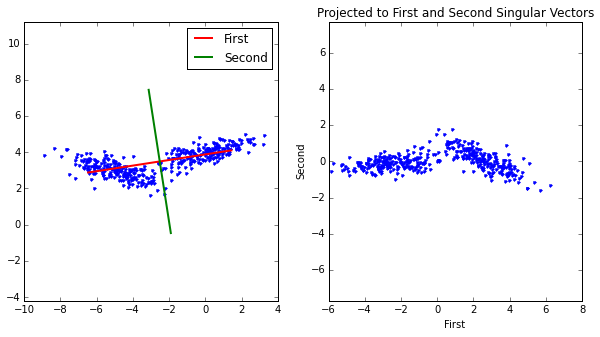

In [6]:
N = 200
data1 = mvNormalRand(N,[0,4],[[0.9,0.8],[0.8,0.9]])
data2 = mvNormalRand(N,[-5,3],[[0.9,0.8],[-0.8,0.9]])
data = np.vstack((data1,data2))

means = np.mean(data,axis=0)

U,S,V = np.linalg.svd(data-means)
V = V.T

plotOriginalAndTransformed(data,V)

And again, with first class 
$\Sigma=\begin{bmatrix} 0.9 & 0.2\\ 0.2 & 20 \end{bmatrix}$
and second class having
$\Sigma=\begin{bmatrix} 0.9 & 0.2\\ -0.2 & 20 \end{bmatrix}$.

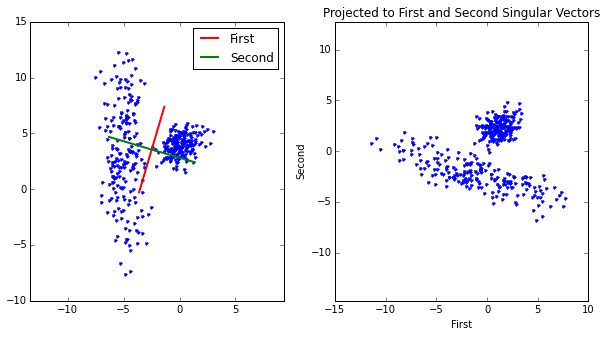

In [7]:
N = 200
data1 = mvNormalRand(N,[0,4],[[0.9,0.2],[0.2,0.9]])
data2 = mvNormalRand(N,[-5,3],[[0.9,0.2],[-0.2,20]])
data = np.vstack((data1,data2))

means = np.mean(data,axis=0)

U,S,V = np.linalg.svd(data - means)
V = V.T

plotOriginalAndTransformed(data,V)

## Sammon Mapping

Introductions to Sammon Mapping are found at
  * [Sammon Mapping in Wikipedia](http://en.wikipedia.org/wiki/Sammon_mapping)
  * [Sammon Mapping](http://homepages.inf.ed.ac.uk/rbf/CVonline/LOCAL_COPIES/AV0910/henderson.pdf), by Paul Henderson

A Sammon Mapping is one that maps each data sample $d_i$ to a location in two dimensions, $p_i$, such that distances between pairs of points are preserved. The objective defined by Sammon is to minimize the squared difference in distances between pairs of data points and their projections through the use of an objective function like
$$
\sum_{i=1}^{N-1} \sum_{j=i+1}^N \left (\frac{||d_i - d_j||}{s} - ||p_i - p_j|| \right )^2
$$
The typical Sammon Mapping algorithm does a gradient descent on this function by adjusting all of the two-dimensional points $p_{ij}$.  Each iteration requires computing all pairwise distances.  

One way to decrease this amount of work is to just work with a subset of points, perhaps picked randomly.  To display all points, we just find an explicit mapping (function) that projects a data sample to a two-dimensional point.  Let's call this $f$, so $f(d_i) = p_i$.  For now, let's just use a linear function for $f$, so 
$$
f(d_i) = d_i^T \theta
$$
where $\theta$ is a $D\times 2$ matrix of coefficients. 

To do this in python, let's start with calculating all pairwise distances.  Let $X$ be our $N\times D$ matrix of data samples, one per row.  We can use a list comprehension to calculate the distance between each row in $X$ and each of the rows following that row.

In [8]:
X = np.array([ [0,1], [4,5], [10,20]])
X

array([[ 0,  1],
       [ 4,  5],
       [10, 20]])

In [9]:
N = X.shape[0] # number of rows
[(i,j) for i in range(N-1) for j in range(i+1,N)]

[(0, 1), (0, 2), (1, 2)]

In [10]:
[X[i,:] - X[j,:] for i in range(N-1) for j in range(i+1,N)]

[array([-4, -4]), array([-10, -19]), array([ -6, -15])]

In [11]:
np.array([X[i,:] - X[j,:] for i in range(N-1) for j in range(i+1,N)])

array([[ -4,  -4],
       [-10, -19],
       [ -6, -15]])

To convert these differences to distances, just

In [12]:
diffs = np.array([X[i,:] - X[j,:] for i in range(N-1) for j in range(i+1,N)])
np.sqrt(np.sum(diffs*diffs, axis=1))

array([  5.65685425,  21.47091055,  16.15549442])

And to calculate the projection, a call to *np.dot* is all that is needed.  Let's make a function to do the projection, and one to convert differences to distances.

In [13]:
def diffToDist(dX):
    return np.sqrt(np.sum(dX*dX, axis=1))

def proj(X,theta):
    return np.dot(X,theta)

In [14]:
diffToDist(diffs)

array([  5.65685425,  21.47091055,  16.15549442])

In [15]:
proj(X,np.array([[1,0.2],[0.3,0.8]]))

array([[  0.3,   0.8],
       [  5.5,   4.8],
       [ 16. ,  18. ]])

Now, to follow the negative gradient of the objective function, we need its gradient, with respect to $\theta$.  With a little work, you can derive it to find
$$
\begin{align*}
\nabla_\theta &=  \frac{1}{2} \sum_{i=1}^{N-1} \sum_{j=i+1}^N \left (\frac{||d_i - d_j||}{s} - ||p_i - p_j|| \right )^2 \\
 &=  2 \frac{1}{2} \sum_{i=1}^{N-1} \sum_{j=i+1}^N \left (\frac{||d_i - d_j||}{s} - ||f(d_i;\theta) - f(d_j;\theta)|| \right ) (-1) \nabla_\theta ||f(d_i;\theta) - f(d_j;\theta)||\\
  &=  - \sum_{i=1}^{N-1} \sum_{j=i+1}^N \left (\frac{||d_i - d_j||}{s} - ||f(d_i;\theta) - f(d_j;\theta)|| \right )  \frac{(d_i-d_j)^T (p_i - p_j)}{||p_i - p_j||} 
  \end{align*}
$$

So, we need to keep the differences around, in addition to the distances.  First, let's write a function for the objective function, so we can monitor it, to make sure we are decrease it with each iteration.  Let's multiply by $1/N$ so the values we get don't grow huge with large $N$.

In [16]:
def objective(X,proj,theta,s):
    N = X.shape[0]
    P = proj(X,theta)
    dX = np.array([X[i,:] - X[j,:] for i in range(N-1) for j in range(i+1,N)])
    dP = np.array([P[i,:] - P[j,:] for i in range(N-1) for j in range(i+1,N)])
    return 1/N * np.sum( (diffToDist(dX)/s - diffToDist(dP))**2)

Now for the gradient
$$
\begin{align*}
\nabla_\theta &=   - \sum_{i=1}^{N-1} \sum_{j=i+1}^N \left (\frac{||d_i - d_j||}{s} - ||f(d_i;\theta) - f(d_j;\theta)|| \right )  \frac{(d_i-d_j)^T (p_i - p_j)}{||p_i - p_j||}  
  \end{align*}
$$


In [17]:
def gradient(X,proj,theta,s):
    N = X.shape[0]
    P = proj(X,theta)
    dX = np.array([X[i,:] - X[j,:] for i in range(N-1) for j in range(i+1,N)])
    dP = np.array([P[i,:] - P[j,:] for i in range(N-1) for j in range(i+1,N)])
    distX = diffToDist(dX)
    distP = diffToDist(dP)
    return -1/N * np.dot((((distX/s - distP) / distP).reshape((-1,1)) * dX).T, dP)

This last line has the potential for dividing by zero!  Let's avoid this, in a very ad-hoc manner, by replacing zeros in *distP* by its smallest nonzero value

In [18]:
def gradient(X,proj,theta,s):
    N = X.shape[0]
    P = proj(X,theta)
    dX = np.array([X[i,:] - X[j,:] for i in range(N-1) for j in range(i+1,N)])
    dP = np.array([P[i,:] - P[j,:] for i in range(N-1) for j in range(i+1,N)])
    distX = diffToDist(dX)
    distP = diffToDist(dP)
    minimumNonzero = np.min(distP[distP>0])
    distP[distP==0] = minimumNonzero
    return -1/N * np.dot((((distX/s - distP) / distP).reshape((-1,1)) * dX).T, dP)

s 0.969969248096
theta
 [[-0.24731016 -0.97159624]
 [-0.98454898  0.24400351]]


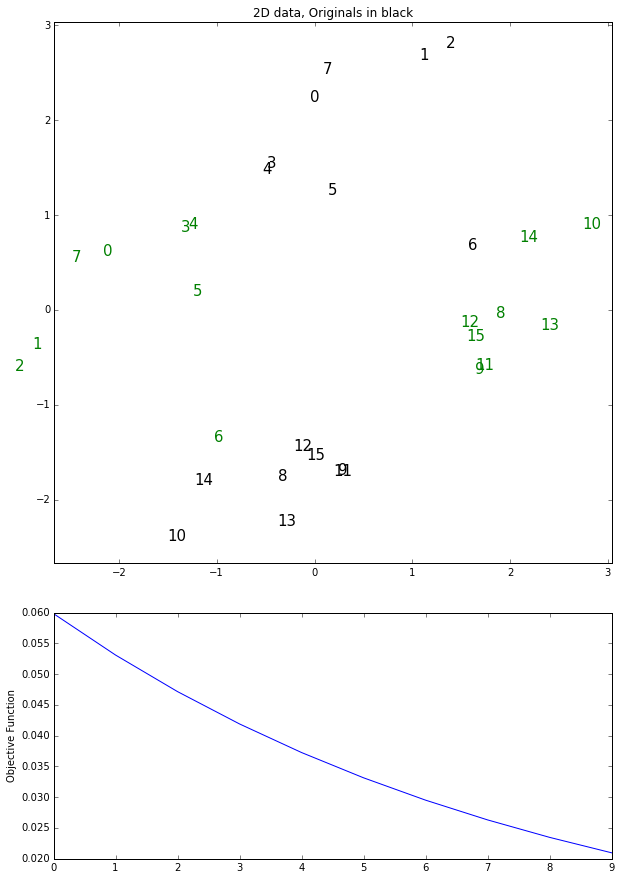

In [19]:
n = 8
X = np.random.multivariate_normal([2,3], 0.5*np.eye(2), n)
X = np.vstack((X,
               np.random.multivariate_normal([1,-1], 0.2*np.eye(2), n)))
X = X - np.mean(X,axis=0)
s = 0.5 * np.sqrt(np.max(np.var(X,axis=0)))
print('s',s)

# theta = np.random.uniform(-1,1,(2,2))
# theta = np.eye(2) + np.random.uniform(-0.1,0.1,(2,2))
u,svalues,v = np.linalg.svd(X)
v = v.T
theta = v[:,:2]

nIterations = 10
vals = []
for i in range(nIterations):
    theta -= 0.001 * gradient(X,proj,theta,s)
    v = objective(X,proj,theta,s)
    vals.append(v)

# print('X\n',X)
# print('P\n',proj(X,theta))
print('theta\n',theta)
plt.figure(figsize=(10,15))
plt.subplot(3,1,(1,2))
P = proj(X,theta)
mn = 1.1*np.min(X)
mx = 1.1*np.max(X)
plt.axis([mn,mx,mn,mx])
#strings = [chr(ord('a')+i) for i in range(X.shape[0])]
strings = [i for i in range(X.shape[0])]
for i in range(X.shape[0]):
    plt.text(X[i,0],X[i,1],strings[i],color='black',size=15)
for i in range(P.shape[0]):
    plt.text(P[i,0],P[i,1],strings[i],color='green',size=15)
plt.title('2D data, Originals in black')

plt.subplot(3,1,3)
plt.plot(vals)
plt.ylabel('Objective Function');

Let's watch the mapping develop.  One way to do this is to save the values of $\theta$ after each iteration, then use *interact* to step through the interations.

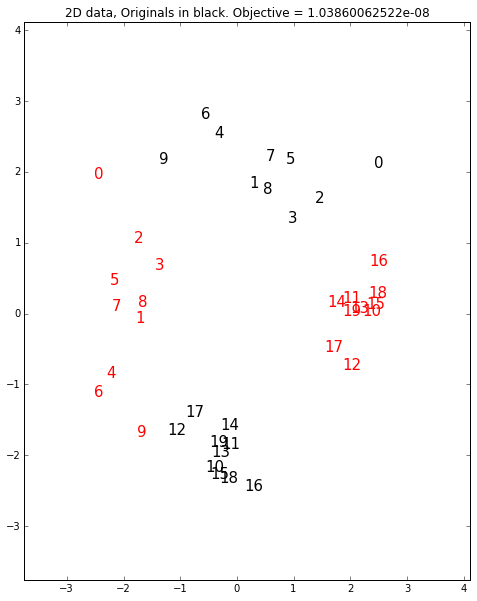

In [20]:
from IPython.html.widgets import interact

n = 10
X = np.random.multivariate_normal([2,3], 0.5*np.eye(2), n)
X = np.vstack((X,
               np.random.multivariate_normal([1,-1], 0.2*np.eye(2), n)))
X = X - np.mean(X,axis=0)
s = 0.5 * np.sqrt(np.max(np.var(X,axis=0)))
print('s',s)

u,svalues,v = np.linalg.svd(X)
V = v.T
theta = V[:,:2]

thetas = [theta] # store all theta values

nIterations = 100
vals = []
for i in range(nIterations):
    theta = theta - 0.01 * gradient(X,proj,theta,s)
    v = objective(X,proj,theta,s)
    thetas.append(theta.copy())
    vals.append(v)


mn = 1.5*np.min(X)
mx = 1.5*np.max(X)

strings = [i for i in range(X.shape[0])]

@interact(i=(0,nIterations-1,1))
def plotIteration(i):
    #plt.cla()
    plt.figure(figsize=(8,10))
    theta = thetas[i]
    val = vals[i]
    P = proj(X,theta)
    plt.axis([mn,mx,mn,mx])
    for i in range(X.shape[0]):
        plt.text(X[i,0],X[i,1],strings[i],color='black',size=15) 
    for i in range(P.shape[0]):
        plt.text(P[i,0],P[i,1],strings[i],color='red',size=15) 
    plt.title('2D data, Originals in black. Objective = ' + str(val))